**DEMONSTARTING A LINEAR REGRESSION MODEL USING PYTORCH**
<br>We are going to construct a linear regression model using a simple perceptron. The regression line that our model will predict is y = 3A + 1.5B + 7C - 1.3D - 5E + 5
<br>The train and test dataset is going to be constructed by us in the form of a numpy array by using a bunch of random numbers. Every sample will consist of 5 features labeled as 'A' to 'E' will the target value labeled as 'Y'. We'll have 80 samples in the train dataset and 10 samples in our test dataset.

In [1]:
#Loading the necessary modules:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

'''Constructing the training dataset:
Create a 80x5 numpy array filled with random numbers, this will be array containing feature vectors
Create a 80x1 numpy array containing the target values'''

train_features=np.random.rand(80,5)*10                      
train_y=3*train_features[:,0]+1.5*train_features[:,1]+7*train_features[:,2]-1.3*train_features[:,3]-5*train_features[:,4]+5
train_dataset=np.column_stack((train_features,train_y))     #Stack the feature and the target vectors column-wise, resulting in a 80x6 matrix

#Constructing the test dataset:
test_features=np.array([[i+k for i in range(5)] for k in range(10)])
test_y=3*test_features[:,0]+1.5*test_features[:,1]+7*test_features[:,2]-1.3*test_features[:,3]-5*test_features[:,4]+5
test_dataset=np.column_stack((test_features,test_y))

#Printing the training and test datasets:
print("Training data\nShape of X and Y:",train_dataset.shape)
print("\nTraining Datset:\n",tabulate(train_dataset[0:5,:],["A","B","C","D","E","Y"],tablefmt="fancy_grid"))
print("\nTest Datset:\n",tabulate(test_dataset[0:5,:],["A","B","C","D","E","Y"],tablefmt="fancy_grid"))

#Store the weights and biases for future comparison
weights = np.array([3,1.5,7,-1.3,-5])
bias = 5

Training data
Shape of X and Y: (80, 6)

Training Datset:
 ╒═══════════╤═════════╤═════════╤═════════╤══════════╤══════════╕
│         A │       B │       C │       D │        E │        Y │
╞═══════════╪═════════╪═════════╪═════════╪══════════╪══════════╡
│ 2.65571   │ 8.96517 │ 9.70293 │ 5.853   │ 0.759053 │  82.9313 │
├───────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│ 8.20912   │ 7.49404 │ 7.34761 │ 9.99074 │ 1.89547  │  69.8364 │
├───────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│ 1.477e-05 │ 8.00588 │ 1.95565 │ 7.7982  │ 8.64265  │ -22.6525 │
├───────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│ 8.08212   │ 8.66539 │ 7.57224 │ 4.17526 │ 4.74185  │  66.1131 │
├───────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│ 3.84837   │ 1.86845 │ 8.77084 │ 3.67017 │ 7.12768  │  40.334  │
╘═══════════╧═════════╧═════════╧═════════╧══════════╧══════════╛

Test Datset:
 ╒═════╤═════╤═════╤═════╤═════╤══════╕
│   A │   B │   C │   D │   E

**CREATING A CUSTOM DATASET OBJECT**
<br>A dataset object will encode all necessary information about our datasets. It will store the dataset, the operations that are going to be performed when fetching some sample from the dataset, and other such functions. 

In [2]:
#Necessary imports:
import torch
from torch.utils.data import Dataset, DataLoader

#Create a custom Dataset class that will extend the Dataset class defined in torch.utils.data
class CustomDataset(Dataset):
  
  '''Defining class constructor:
  Self passes a reference to the object being refereed to, type defines whether its the test or train dataset
  datasets contains the train or test datasets, the i'th feature vector can be accessed as [i,0:4] with its target value as [i,5]'''

  def __init__(self,type,datasets):
    self.data = datasets.astype(np.float32)                       #Convert the numpy array to type float32 (will be required later)
    print("PRINTING THE SHAPE OF THE",type.upper(),"DATASET:")
    print("Shape of dataset:\nDataset contains %d samples and %d features\n"%(self.data.shape[0],self.data.shape[1]-1))

  #Fetching data from a specific index:
  #idx is the index of the sample that is to be retreived

  def __getitem__(self,idx):
    feature_vector = torch.from_numpy(self.data[idx][0:5])         #Create a Tensor* from a numpy array
    target_val = torch.from_numpy(self.data[idx][5].reshape(1,1))  #Convert the target value into a single value (just in case)
    return(feature_vector,target_val)

  #Get the length of the dataset (The number of samples):
  def __len__(self):
    return(self.data.shape[0])

'''Creating Dataloaders:
As its name implies, a dataloader is used for loading a dataset object. It wraps an iterable around 
the Dataset to enable easy access to the samples. batch_size is the number of samples that are going to fetched in every batch.
shuffle specifies whether the samples are to be shuffled before loading them.''' 

trainloader = DataLoader(CustomDataset("train",train_dataset),batch_size=8,shuffle=True)
testloader = DataLoader(CustomDataset("test",test_dataset),batch_size=8,shuffle=True)

'''*A Tensor is a multi-dimensional array that is used for storing data in PyTorch models. It is an improvement over normal matrices/arrays in terms of 
#floating point calculations, which can be considered as the life-blood of any deep learning model.'''

PRINTING THE SHAPE OF THE TRAIN DATASET:
Shape of dataset:
Dataset contains 80 samples and 5 features

PRINTING THE SHAPE OF THE TEST DATASET:
Shape of dataset:
Dataset contains 10 samples and 5 features



'*A Tensor is a multi-dimensional array that is used for storing data in PyTorch models. It is an improvement over normal matrices/arrays in terms of \n#floating point calculations, which can be considered as the life-blood of any deep learning model.'

In [3]:
#TESTING THE DATASET CLASS DEFINED EARLIER
ob=CustomDataset("train",train_dataset)
ob.__len__()
ob.__getitem__(1)

PRINTING THE SHAPE OF THE TRAIN DATASET:
Shape of dataset:
Dataset contains 80 samples and 5 features



(tensor([8.2091, 7.4940, 7.3476, 9.9907, 1.8955]), tensor([[69.8364]]))

**Describing how the Dataloader looks and works like:**
<br>The Dataloader, as mentioned earlier, simply wraps an iterable around the Dataset object as defined in the custom dataset class. For implementation details on how elements are fetched from the dataset, refer to the custom dataset class created earlier.
<br>Notice how every 'sample' actually consists of the number of samplesas defined in batch size when creating the dataloader. Thus the entire dataset is divided into n/b number of batches where n = number of samples, b = batch size.

In [4]:
#Printing some of the batches
i=1
for x_val, y_val in trainloader:                                          #X_val contains the feature vector, y_val the target value
  print(f"{i}. x ={x_val.numpy()}\ny={y_val.squeeze().numpy()}\n")        #.numpy() converts a tensor to a numpy, .squeeze() removes any extra, useless
                                                                          #dimensions in a tensor
  if i==1:
    test_input_data = x_val                                               #Store a single batch for testing and debugging purpose
    test_output_data = y_val
  if i==3:                                                                #We only need to see the first few batches to get an idea
    break
  i+=1

1. x =[[2.8627524 8.230325  2.3306167 4.439615  3.941504 ]
 [1.734002  2.5520337 0.499811  1.149166  2.155439 ]
 [2.4356983 6.3251443 1.4687523 1.2502189 4.1528687]
 [2.7392118 3.9452689 0.9429973 5.585685  6.620415 ]
 [1.0603603 9.381672  6.702698  1.0448259 7.1368055]
 [6.504115  4.422126  3.309543  7.2269926 9.5860615]
 [3.3987231 3.9274616 6.001424  9.343537  7.7310314]
 [3.1412601 2.801098  6.1998806 7.053976  9.406792 ]]
y=[ 16.769041    5.2576237   9.686448  -14.626946   32.130177   -3.013063
  12.295574    5.8204613]

2. x =[[6.474828   0.9616233  3.3291519  0.4084269  5.5535245 ]
 [0.44827172 4.700514   0.966688   9.628265   0.03691919]
 [6.7593627  1.7257448  2.417915   8.809715   5.1467357 ]
 [6.1828914  5.7660666  3.9997358  8.481402   9.552987  ]
 [5.6892886  0.4656631  6.280756   9.590663   0.17531641]
 [7.1319666  7.5756583  0.7023167  6.3765826  9.41389   ]
 [9.320354   5.094371   7.894435   9.9530115  9.656826  ]
 [3.9131055  4.3228664  9.50942    9.977547   5.4834433 

**MAKING THE MODEL**
<br>We'll make a simple perceptron consisting of no hidden layers. It will have 5 input nodes corresponding to the 5 features, and 1 output node. No activation function will be required.
<br>Here's how a perceptron looks like:
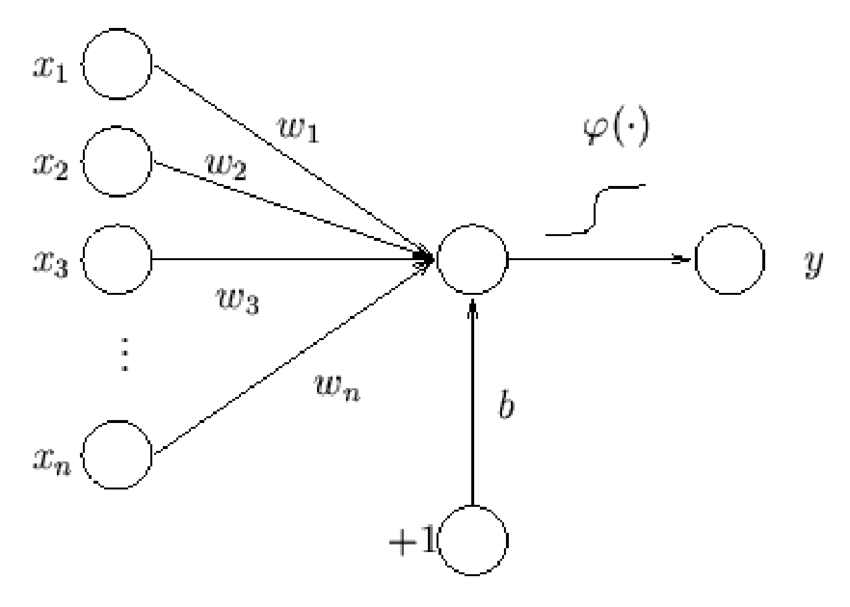

In [5]:
#Nessecary imports

from torch import nn                                                            #The nn module is the root class of all neural-network related classes

#Use CUDA if GPU is available, else use cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

#Defining the neural network
# We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. 
# Every nn.Module subclass implements the operations on input data in the forward method.

class MyModel(nn.Module):

  #Class constructor:
  # Initializes the layers, with the input and the output nodes along with the type of activation function to be applied
  # (Linear in this case)
  def __init__(self,in_features,out_features):
     super(MyModel, self).__init__()
     self.layer = nn.Linear(in_features,out_features)
  
  #Defines the feed forward operation
  def forward(self,x):
     out = self.layer(x)
     return out

#Creating an instance of the model created
model = MyModel(train_dataset.shape[1]-1,1).to(device)
print(f"Model description: \n{model}")

Using cpu device
Model description: 
MyModel(
  (layer): Linear(in_features=5, out_features=1, bias=True)
)


In [6]:
#TESTING THE MODEL CREATED
print(f"Shape of input data: {test_input_data.size()}\nShape of Output Data:{test_output_data.squeeze().size()}")
print(f"Input data: {test_input_data}\n Output data: {test_output_data.squeeze()}")
output=model(test_input_data)                                                   #Pass the input data to the model to make a forward pass
print(f"Size of output: {output.squeeze().size()}")
lossFn = nn.MSELoss()
lossval = lossFn(output.squeeze(),test_output_data.squeeze())
print(f"Predictions: {output}\nLoss={lossval.item()}")
for name, param in model.named_parameters():                                    #View the initial weights and biases of the model
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Shape of input data: torch.Size([8, 5])
Shape of Output Data:torch.Size([8])
Input data: tensor([[2.8628, 8.2303, 2.3306, 4.4396, 3.9415],
        [1.7340, 2.5520, 0.4998, 1.1492, 2.1554],
        [2.4357, 6.3251, 1.4688, 1.2502, 4.1529],
        [2.7392, 3.9453, 0.9430, 5.5857, 6.6204],
        [1.0604, 9.3817, 6.7027, 1.0448, 7.1368],
        [6.5041, 4.4221, 3.3095, 7.2270, 9.5861],
        [3.3987, 3.9275, 6.0014, 9.3435, 7.7310],
        [3.1413, 2.8011, 6.1999, 7.0540, 9.4068]])
 Output data: tensor([ 16.7690,   5.2576,   9.6864, -14.6269,  32.1302,  -3.0131,  12.2956,
          5.8205])
Size of output: torch.Size([8])
Predictions: tensor([[ 0.3697],
        [-0.5461],
        [-0.7825],
        [ 0.3600],
        [-2.1048],
        [-1.3996],
        [-0.2172],
        [-1.5027]], grad_fn=<AddmmBackward0>)
Loss=252.7086944580078
Layer: layer.weight | Size: torch.Size([1, 5]) | Values : tensor([[-0.3450,  0.1473, -0.3386,  0.4023, -0.1314]],
       grad_fn=<SliceBackward0>) 

Lay

**MODEL TRAINING AND OPTIMIZATION**
<br>Here we will define the loss function, the optimization function and the other hyperparameters we will need to train our model. We will also define the training loop where our model will make predictions, calculate loss, gradients and update its weights and biases.

Epoch: 1	Training loss: 7876.5757	Test loss: 12.1126
Epoch: 2	Training loss: 1224.4000	Test loss: 86.3487
Epoch: 3	Training loss: 51.9751	Test loss: 23.0118
Epoch: 4	Training loss: 17.5847	Test loss: 31.9455
Epoch: 5	Training loss: 17.8242	Test loss: 8.8059
Epoch: 6	Training loss: 15.2718	Test loss: 22.5736
Epoch: 7	Training loss: 15.5227	Test loss: 15.2208
Epoch: 8	Training loss: 16.2406	Test loss: 9.9020
Epoch: 9	Training loss: 14.7313	Test loss: 9.0305
Epoch: 10	Training loss: 16.7754	Test loss: 13.1404
Epoch: 11	Training loss: 14.2656	Test loss: 10.0714
Epoch: 12	Training loss: 14.6463	Test loss: 13.7737
Epoch: 13	Training loss: 14.2734	Test loss: 11.9676
Epoch: 14	Training loss: 14.1221	Test loss: 14.1965
Epoch: 15	Training loss: 13.8020	Test loss: 13.8279
Epoch: 16	Training loss: 13.9723	Test loss: 10.0988
Epoch: 17	Training loss: 13.6339	Test loss: 12.1947
Epoch: 18	Training loss: 12.9504	Test loss: 11.3901
Epoch: 19	Training loss: 13.2616	Test loss: 16.3431
Epoch: 20	Training l

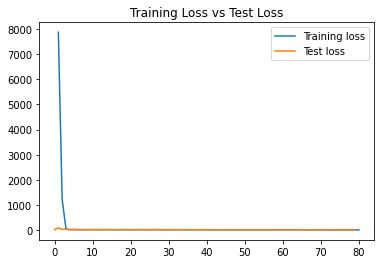

In [7]:
#Initializing hyperparams

alpha = 0.001                                                                   #Learning rate
epochs = 80                                                                     #Number of iterations

#Initializing the loss fn

loss_fn = nn.MSELoss()                                                          #Using Mean Squared Error since its a regression problem

#Initializing the optimization/learning algorithm:

optimizer = torch.optim.SGD(model.parameters(),lr=alpha,momentum=0.8)           #Using Stochastic Gradient descent with momentum to reduce overfitting
y_train=[]
y_test=[]

'''Optimization loop
Each time this loop runs, a batch will be fetched by the dataloader defined earlier, and the model will make predictions 
on each sample present in the batch. Then the loss will be calculated over the entire batch using the predictions made earlier
This process will be repeated for all the batches, in every iteration.'''

for epoch in range(epochs):
  
  #Reset training and test loss in every epoch
  trainloss=0
  testloss=0

  #Use the dataloader to load training samples from the training dataset, one batch at a time
  for x_vector, target_val in trainloader:
    
    # Compute prediction and loss:

    optimizer.zero_grad()                                                       #Reset gradients so that they don't add up    
    pred_val = model(x_vector)                                                  #Make a forward pass to get the predictions, will generate a batch_size x 1 vector
    loss = loss_fn(pred_val.squeeze(),target_val.squeeze())                     #Squeeze out any useless dims and calculate loss using loss function

    # Backpropagation

    loss.backward()                                                             #Calculate gradients on the loss calculated           
    optimizer.step()                                                            #Update weights using the optimization function defined earlier

    #Update training loss after each batch is loaded
    trainloss+=loss.item()
  
  '''Using the parameters/weights learned so far, test the model on the test dataset
  The process followed below is the same one followed in case of the training dataset, only difference is no gradients are calculated
  or weights updated as this is the test dataset.''' 

  for x_vector, target_val in testloader:

    #Predict for each sample in a batch:
    pred_val = model(x_vector)
    loss = loss_fn(pred_val.squeeze(),target_val.squeeze())

    #Since this is the test dataset, just update the test loss and do NOT update the weights
    testloss+=loss.item()
  
  #Print training and test loss in every epoch:
  print("Epoch: %d\tTraining loss: %1.4f\tTest loss: %1.4f" %(epoch+1,trainloss,testloss))
  y_train.append(trainloss)
  y_test.append(testloss)

#Plot training vs test error to get a better view of how our model performs  
plt.plot([i+1 for i in range(epochs)],y_train,y_test)
plt.legend(['Training loss','Test loss'])
plt.title('Training Loss vs Test Loss')
plt.show()

In [8]:
#TESTING THE MODEL AFTER IT HAS BEEN TRAINED

test=np.array([3,1,4,2,6],dtype=np.float32)
check=model(torch.from_numpy(test))
actual = np.matmul(test,weights)
print(f"Predicted value: {check.detach().numpy()[0]}\nActual value: {actual}")  
for name, param in model.named_parameters():
    print(f"{'Predicted weights:' if name=='layer.weight' else 'predicted bias'} {param[:2].detach().numpy()[0]}")
print(f"Actual weights: {weights}\nActual bias: {bias}")

Predicted value: 9.493069648742676
Actual value: 5.899999999999999
Predicted weights: [ 3.112025   1.6558194  7.123486  -1.1811001 -4.918354 ]
predicted bias 1.8795559406280518
Actual weights: [ 3.   1.5  7.  -1.3 -5. ]
Actual bias: 5
